In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import colorsys as csys
import matplotlib.colors as clr

In [2]:
# data for seismic subplot
traces = np.loadtxt('PenobXL_1155.txt')
traces = np.fliplr(np.transpose(traces)) # rearrange traces for plotting
m=np.amin(traces)
M=np.amax(traces)

In [10]:
def sigmoid_demo(w=1):
    x = np.linspace(0,10,256)  # x coordinate for sigmoid curve
    sgm = 1/(1+np.exp(-(x-5)/(w+0.001)))     # sigmoid curve of length = 10, center = 5, width ~ w
                                             # +0.001 added to avoid dividing by w=0
    sgm = (sgm-min(sgm))/(max(sgm)-min(sgm)) # normalize so sigmoid is always in range 0-1
                                             # this is used as Lightness
        
    # for colorbar subplot
    h = np.zeros(256)
    s = np.zeros(256)
    hls_sigm = np.array(zip(h, sgm, s)) # Hue-Lightness-Saturation sigmoid colormap
    # next block to convert sigmoid colormap from HLS to RGB 
    rgb_sigm = []
    for hls_val in hls_sigm:
        h,l,s = hls_val
        temp = csys.hls_to_rgb(h, l, s)
        rgb_sigm.append(temp)
    rgb_sigm= np.array(rgb_sigm)
    rgb_sigmoid = np.array(zip(rgb_sigm[:,0], rgb_sigm[:,1], rgb_sigm[:,2])) 
    
    # matplotlib RGB sigmoid colormap (LinearSegmentedColormap) for seismic subplot
    r3=r2=rgb_sigm[:,0] # value of red at sample n
    r1=np.linspace(0,1,len(r2)) # position of sample n - ranges from 0 to 1
    g3=g2=rgb_sigm[:,1]
    g1=np.linspace(0,1,len(g2))
    b3=b2=rgb_sigm[:,2]
    b1=np.linspace(0,1,len(b2)) 
    r=zip(r1,r2,r3) # red list
    g=zip(g1,g2,g3) # green list
    b=zip(b1,b2,b3) # blue list
    rgb_=zip(r,g,b) # creating final list
    rgb=zip(*rgb_)  # transposing list
    k=['red', 'green', 'blue'] # keys
    sigmoid_gray=dict(zip(k,rgb)) # makes a dictionary for LinearSegmentedColormap
    my_sigmoid_cmap = clr.LinearSegmentedColormap('my_colormap',sigmoid_gray)
       
    # plot everything
    fig = plt.figure(figsize=(24,22))
     
    # coordinates for sigmoid and colorbar subplots
    xspl = np.linspace(0,256,256) # sample number 
    sn = sgm*100                  # lightness in the range 0-100
    
    #  sigmoid subplot
    ax1 = plt.subplot2grid((8,5), (0,0),colspan=2, rowspan = 1)
    ax1.set_xticks([])
    plt.plot(xspl,sn,lw=2,color='black')
    plt.xlim(xspl.min(), xspl.max())
    plt.ylim(0, 100)
    ax1.set_ylabel('Lightness', fontsize = '20')
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax1.set_xlabel('Colormap sample number', fontsize = '20' )
    
    # colorbar subplot
    ax2 = plt.subplot2grid((8,5), (1,0),colspan=2, rowspan = 2)
    ax2.set_yticks([])
    plt.imshow([rgb_sigmoid], interpolation = 'none', cmap = 'gray', aspect = 70)
    ax2.set_xlabel('Colormap sample number', fontsize = '20' )
    ax2.tick_params(axis='both', which='major', labelsize=16)
    
      
    # plot contrast value and w parameter value
    ctr = (sn[128]-sn[127]) # contrast value
    ax3 = plt.subplot2grid((8,5), (4,0),colspan=1, rowspan = 1)
    ax3.set_axis_off()
    bbox_props = dict(boxstyle="square, pad=0.5", fc="white", ec="0.5")
    ax3.text(0.4, 0.4, 'Lightness contrast = {0:.2f}'.format(ctr), ha="center", 
                 va="center", size=15, bbox=bbox_props)
    ax3.text(0.27, 0, 'w parameter = {0:.2f}'.format(w), ha="center", 
                 va="center", size=15, bbox=bbox_props)
       
    # seismic subplot
    ax4 = plt.subplot2grid((8,5), (0,2),colspan = 3, rowspan = 5)
    plt.imshow(traces[:750,100:], vmin=m, vmax=M, cmap = my_sigmoid_cmap,aspect = 0.5)
    ax4.set_xticks([])
    ax4.set_yticks([])
    
    plt.show()


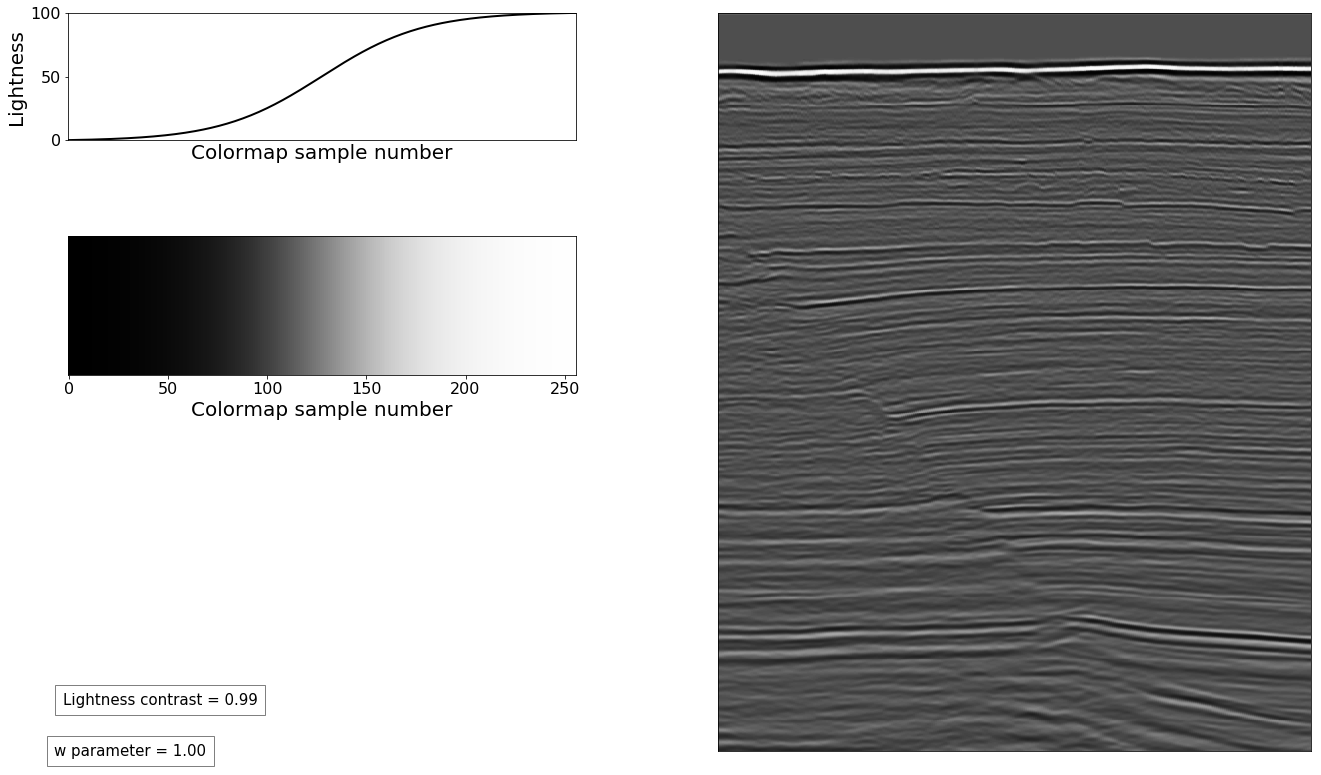

<function __main__.sigmoid_demo(w=1)>

In [14]:
np.seterr(over='ignore')
interactive_plot = interact(sigmoid_demo, w=(-2.7,2.7,0.1));